In [0]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

是什麼? 汽車


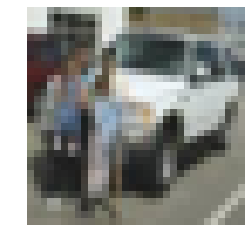

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 49999)
print("是什麼?", trans[y_train[c][0]])
plt.axis("off")
plt.imshow(x_train[c])

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
# Flatten: 把輸入拉成一維
from keras.layers import Dense, Flatten
cnn = Sequential()
# 一個filter(3 * 3 * 3(RGB)) * 64(個) + 64(bias) = 1792
cnn.add(Conv2D(64, (3, 3), 
               padding="same", 
               activation="relu",
               input_shape=(32, 32, 3)))
cnn.add(MaxPooling2D())
# 一個filter(3 * 3 * 64(不知名描述)) * 128(個) + 128 = 73856
cnn.add(Conv2D(128, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(256, (3, 3), 
               padding="same", 
               activation="relu"))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(512, activation="relu"))
cnn.add(Dense(128, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

W0715 11:39:27.353390 139794770106240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0715 11:39:27.393872 139794770106240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0715 11:39:27.401014 139794770106240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0715 11:39:27.432228 139794770106240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [7]:
# 圖片不用再reshape
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
print("原本:", y_train[0])
print("後來:", y_train_cat[0])

原本: [6]
後來: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [8]:
cnn.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

W0715 11:39:28.607758 139794770106240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0715 11:39:28.644942 139794770106240 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
cnn.fit(x_train_norm, y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
 - 10s - loss: 1.0692 - acc: 0.6221 - val_loss: 0.9161 - val_acc: 0.6842
Epoch 2/10
 - 9s - loss: 0.8604 - acc: 0.6972 - val_loss: 0.8280 - val_acc: 0.7104
Epoch 3/10
 - 9s - loss: 0.7121 - acc: 0.7507 - val_loss: 0.7738 - val_acc: 0.7408
Epoch 4/10
 - 9s - loss: 0.5976 - acc: 0.7924 - val_loss: 0.6805 - val_acc: 0.7722
Epoch 5/10
 - 9s - loss: 0.5004 - acc: 0.8250 - val_loss: 0.6759 - val_acc: 0.7702
Epoch 6/10
 - 9s - loss: 0.3965 - acc: 0.8616 - val_loss: 0.6629 - val_acc: 0.7858
Epoch 7/10
 - 9s - loss: 0.3109 - acc: 0.8909 - val_loss: 0.7797 - val_acc: 0.7714
Epoch 8/10
 - 9s - loss: 0.2359 - acc: 0.9180 - val_loss: 0.8056 - val_acc: 0.7756
Epoch 9/10
 - 9s - loss: 0.1733 - acc: 0.9399 - val_loss: 0.8705 - val_acc: 0.7776
Epoch 10/10
 - 9s - loss: 0.1240 - acc: 0.9576 - val_loss: 0.9222 - val_acc: 0.7788


In [12]:
cnn.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 2s 178us/step


[1.0426905606269836, 0.7488]

In [0]:
pre = cnn.predict_classes(x_test_norm)

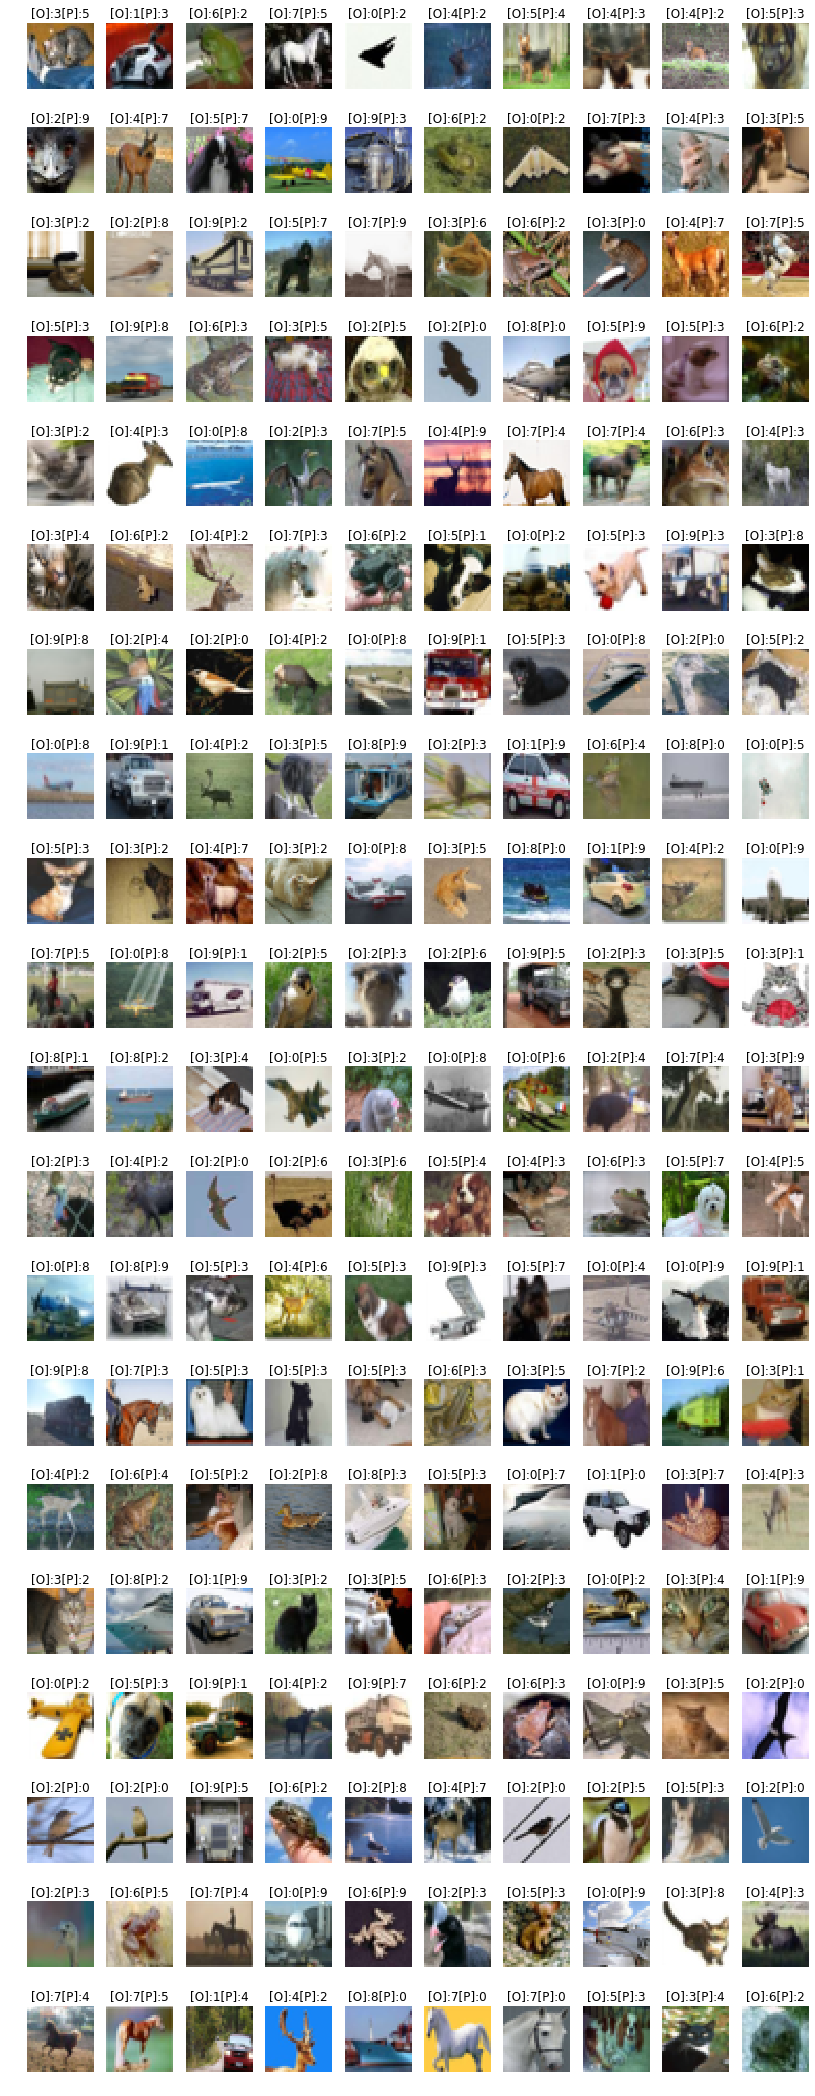

In [20]:
import numpy as np
# 找出所有不相等(預測錯誤)的位置
idx = np.nonzero(pre != y_test.reshape(10000))[0]
idx = idx[:200]
# 拿出預測錯誤的image
false_pre_img = x_test[idx]
# 拿出預測錯誤的正確答案
false_pre_right_label = y_test[idx]
# 拿出預測錯誤的預測答案
false_pre_label = pre[idx]

width = 10
height = len(false_pre_img) // 10 + 1
plt.figure(figsize=(14, 40))
for i, img in enumerate(false_pre_img):
    plt.subplot(height, width, i+1)
    t = ("[O]:" + str(false_pre_right_label[i][0]) +
         "[P]:" + str(false_pre_label[i]))
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)
# trans = ["飛機", "汽車", "鳥", "貓", "鹿", "狗", "青蛙", "馬", "船", "卡車"]